<a href="https://colab.research.google.com/github/carloscariello/Inad_PJ_-pequeno_porte-_Financ_Exportacao/blob/main/analise_taxa_inadimplencia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importando as bibliotecas necessárias
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [19]:
# Definindo os parâmetros da API
codigo_serie = 27242  # Substitua pelo código da série desejada
data_inicial = "01/01/2010"
data_final = "31/12/2020"

In [20]:

# Construindo a URL da API
api_url = f"https://api.bcb.gov.br/dados/serie/bcdata.sgs.{codigo_serie}/dados?formato=json&dataInicial={data_inicial}&dataFinal={data_final}"
# Fazendo a requisição dos dados JSON
response = requests.get(api_url)
response

<Response [200]>

In [21]:
# Verificando se a requisição foi bem-sucedida
if response.status_code == 200:
    json_data = response.json()
    
    # Convertendo os dados JSON em um DataFrame
    data = pd.DataFrame(json_data)
else:
  print("Erro ao obter os dados JSON:", response.status_code)

data.shape

(35, 2)

In [22]:
data['data'] = pd.to_datetime(data['data'], format='%d/%m/%Y')
data['valor'] = data['valor'].astype(float)

data.sort_values(["valor"], ascending=False).head()

,data,valor
21,2017-07-01,71.1
23,2018-01-01,50.8
8,2014-01-01,24.0
25,2018-07-01,17.5
24,2018-04-01,16.2


In [23]:
# Calculando estatísticas
media = data['valor'].mean()
maximo = data['valor'].max()
minimo = data['valor'].min()
data_maximo = data.loc[data['valor'] == maximo, 'data'].values[0]
data_minimo = data.loc[data['valor'] == minimo, 'data'].values[0]

In [24]:
# Exibindo estatísticas
print(f'Média da taxa de inadimplência: {media:.2f}%')
print(f'Taxa de inadimplência máxima: {maximo}% em {data.loc[data["valor"] == maximo, "data"].dt.to_pydatetime()[0].strftime("%d/%m/%Y")}')
print(f'Taxa de inadimplência mínima: {minimo}% em {data.loc[data["valor"] == minimo, "data"].dt.to_pydatetime()[0].strftime("%d/%m/%Y")}')


Média da taxa de inadimplência: 6.85%
Taxa de inadimplência máxima: 71.1% em 01/07/2017
Taxa de inadimplência mínima: 0.0% em 01/07/2012


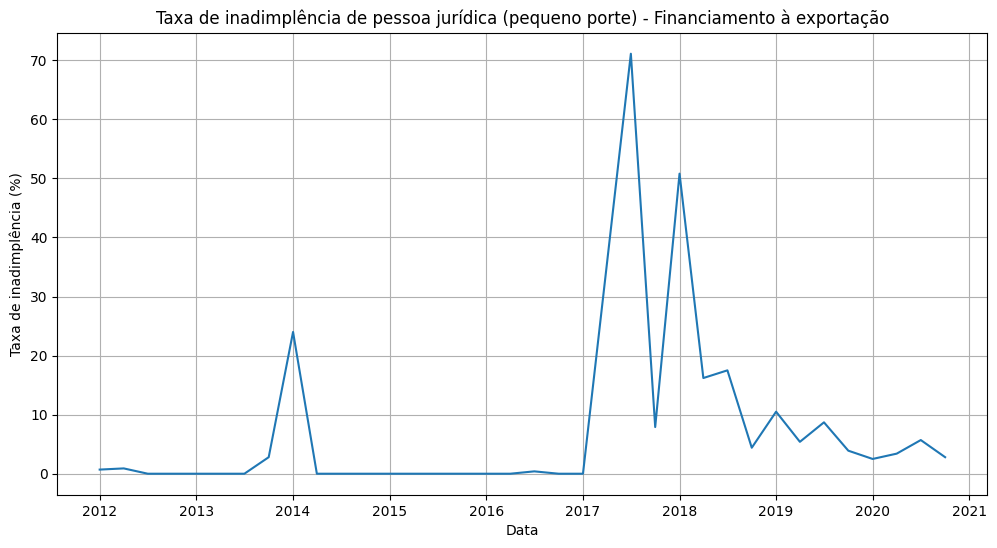

In [25]:
# Plotando gráfico de linha da taxa de inadimplência
plt.figure(figsize=(12, 6))
plt.plot(data['data'], data['valor'])
plt.title('Taxa de inadimplência de pessoa jurídica (pequeno porte) - Financiamento à exportação')
plt.xlabel('Data')
plt.ylabel('Taxa de inadimplência (%)')
plt.grid(True)
plt.show()

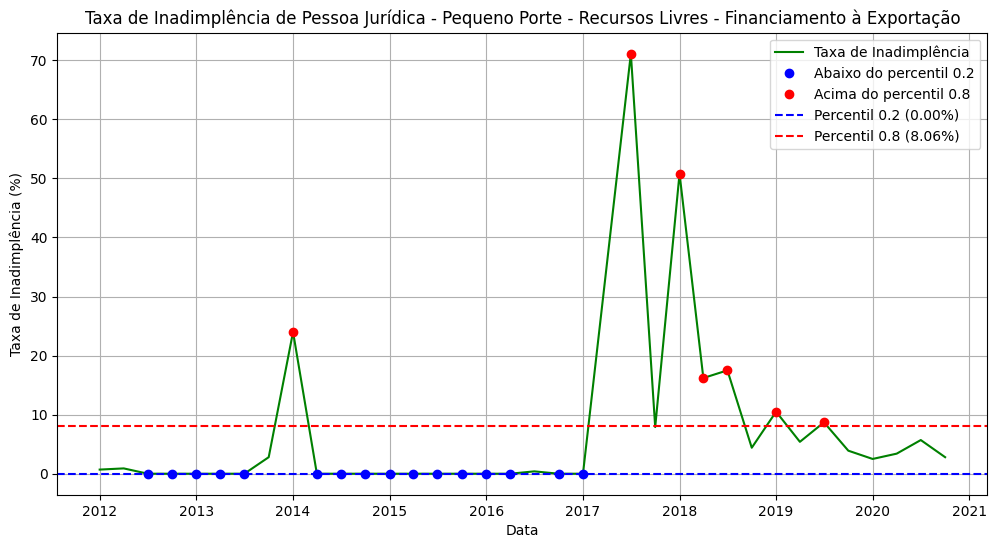

In [27]:
import matplotlib.pyplot as plt

# Calcular os percentis
percentil_02 = data['valor'].quantile(0.2)
percentil_08 = data['valor'].quantile(0.8)

# Separar os pontos abaixo e acima dos percentis
abaixo_percentil_02 = data[data['valor'] <= percentil_02]
acima_percentil_08 = data[data['valor'] >= percentil_08]

# Criar o gráfico de linha
plt.figure(figsize=(12, 6))
plt.plot(data['data'], data['valor'], 'g-', label='Taxa de Inadimplência')

# Destacar os pontos abaixo e acima dos percentis
plt.plot(abaixo_percentil_02['data'], abaixo_percentil_02['valor'], 'bo', label='Abaixo do percentil 0.2')
plt.plot(acima_percentil_08['data'], acima_percentil_08['valor'], 'ro', label='Acima do percentil 0.8')

# Adicionar linhas horizontais representando os percentis 0.2 e 0.8
plt.axhline(percentil_02, color='blue', linestyle='--', label=f'Percentil 0.2 ({percentil_02:.2f}%)')
plt.axhline(percentil_08, color='red', linestyle='--', label=f'Percentil 0.8 ({percentil_08:.2f}%)')

plt.xlabel('Data')
plt.ylabel('Taxa de Inadimplência (%)')
plt.title('Taxa de Inadimplência de Pessoa Jurídica - Pequeno Porte - Recursos Livres - Financiamento à Exportação')
plt.legend()
plt.grid()
plt.show()


[RESPOSTA CHATGPT 4.0]

Como meu conhecimento é limitado a informações disponíveis até setembro de 2021, aqui estão algumas informações e eventos relevantes que ocorreram no Brasil durante o primeiro semestre de 2017:

* Crise política: O Brasil enfrentou uma crise política em 2017, com 
investigações de corrupção em andamento, afetando o governo e os negócios. Essa instabilidade política pode ter contribuído para a incerteza econômica e dificultado o ambiente de negócios.
* Condições econômicas: Em 2017, o Brasil estava emergindo de uma recessão profunda que começou em 2014 e durou até 2016. O crescimento econômico foi lento, e o desemprego e a inflação permaneceram altos. Essas condições econômicas desfavoráveis podem ter afetado negativamente as pequenas empresas de exportação e sua capacidade de cumprir obrigações de dívida.
* Desvalorização da moeda: A moeda brasileira, o real, sofreu desvalorização em relação ao dólar americano em 2017 devido à incerteza política e econômica. Isso pode ter aumentado o custo das dívidas denominadas em moeda estrangeira e afetado negativamente a competitividade das exportações.
* Política comercial global: Em 2017, houve uma mudança na política comercial dos Estados Unidos, com o país adotando uma postura mais protecionista. Isso pode ter gerado incerteza no comércio global e afetado as exportações brasileiras.
* Setores específicos: O Brasil é um grande exportador de commodities, como minério de ferro, petróleo e produtos agrícolas. Flutuações nos preços dessas commodities podem afetar negativamente a receita e a rentabilidade das empresas de exportação.
* Embora esses eventos possam ter contribuído para o aumento da taxa de inadimplência em 2017, é importante observar que é necessário realizar uma análise mais detalhada e abrangente para identificar os fatores exatos que levaram a esse aumento